In [1]:
import json
import os
import sys
from copy import deepcopy
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import skimage
import tifffile
import yaml

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom import Mushroom, DEFAULT_CONFIG
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils
import mushroom.data.datasets as datasets

In [5]:
source_root = '/diskmnt/Projects/Users/estorrs/mushroom/data'
target_root = '/data/estorrs/mushroom/data'

In [6]:
run_dir = '/data/estorrs/mushroom/data/projects/submission_v1'

In [7]:
def alter_filesystem(config, source_root, target_root):
    for entry in config['sections']:
        for mapping in entry['data']:
            mapping['filepath'] = mapping['filepath'].replace(source_root, target_root)
    
    kwargs = config['trainer_kwargs']
    if kwargs['data_mask'] is not None:
        kwargs['data_mask'] = kwargs['data_mask'].replace(source_root, target_root)
    if kwargs['out_dir'] is not None:
        kwargs['out_dir'] = kwargs['out_dir'].replace(source_root, target_root)
    
    
        
    return config

###### glacier cases

C3L-00970  C3L-00982  C3L-01287  C3L-02551  HT206B1  HT225C1  HT268B1  HT339B2-H1  HT397B1  HT413C1-K2  HT413C1-Th1k4A1  HT448C1-Th1K1Fp1  HT553P1-H2  HT565B1-H2  kidney  lightsheet  S18-25943-A7  S18-5591-C8  S18-9906  WD-76845


In [8]:
case = 'HT397B1'
# case = 'C3L-00970'
# case = 'C3L-00982'
# case = 'C3L-01287'
# case = 'C3L-02551'
# case = 'HT206B1'
# case = 'HT225C1'
# case = 'HT268B1'
# case = 'HT339B2-H1'
# case = 'HT413C1-K2'
# case = 'HT413C1-Th1k4A1'
# case = 'HT448C1-Th1K1Fp1'
# case = 'HT553P1-H2'
# case = 'HT565B1-H2'
# case = 'S18-25943-A7'
# case = 'S18-5591-C8'
# case = 'S18-9906'

out_dir = os.path.join(run_dir, case, 'projected_features')
Path(out_dir).mkdir(parents=True, exist_ok=True)

In [9]:
config = yaml.safe_load(open(os.path.join(run_dir, case, 'mushroom', 'config.yaml')))
mushroom_dir = os.path.join(run_dir, case, 'mushroom')

config

{'dtype_specific_params': {'visium': {'trainer_kwargs': {'target_resolution': 0.01,
    'tiling_method': 'radius'}}},
 'dtype_to_chkpt': {'batch2_he': '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom/batch2_he_chkpts/last-v1.ckpt',
  'he': '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom/he_chkpts/last-v1.ckpt',
  'multiplex': '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom/multiplex_chkpts/last-v1.ckpt',
  'visium': '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom/visium_chkpts/last-v1.ckpt'},
 'sae_kwargs': {'codebook_dim': 64,
  'dtype_to_decoder_dims': {'cosmx': [256, 512, 1024],
   'he': [256, 128, 10],
   'multiplex': [256, 128, 64],
   'points': [256, 512, 1024],
   'visium': [256, 512, 2048],
   'xenium': [256, 256, 256]},
  'encoder_dim': 128,
  'neigh_scaler': 0.01,
  'num_clusters': [8, 4, 2],
  'patch_size': 1,
  'recon_scaler': 1.0,
  'size': 8},
 'sections': [{'data': [{'dtype': 'visium',
   

###### katmai cases

In [ ]:
# case = ''

## transfer nbhds

In [10]:
mushroom = Mushroom.from_config(mushroom_dir)

INFO:root:loading spore for batch2_he
INFO:root:data mask detected
INFO:root:starting batch2_he processing
INFO:root:6 sections detected: ['HT397B1-U4', 'HT397B1-U8', 'HT397B1-U11', 'HT397B1-U16', 'HT397B1-U20', 'HT397B1-U28']
INFO:root:processing sections
INFO:root:generating image data for section HT397B1-U4
INFO:root:generating image data for section HT397B1-U8
INFO:root:generating image data for section HT397B1-U11
INFO:root:generating image data for section HT397B1-U16
INFO:root:generating image data for section HT397B1-U20
INFO:root:generating image data for section HT397B1-U28
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 6 sections detected: [('HT397B1-U4', 'batch2_he'), ('HT397B1-U8', 'batch2_he'), ('HT397B1-U11', 'batch2_he'), ('HT397B1-U16', 'batch2_he'), ('HT397B1-U20', 'batch2_he'), ('HT397B1-U28', 'batch2_he')]
INFO:root:creating data loaders
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/

Predicting: |                                                                                                 …

INFO:root:embedding he spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding visium spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

In [11]:
mushroom.dtypes

['batch2_he', 'he', 'multiplex', 'visium']

In [12]:
mushroom.section_ids

[('HT397B1-U1', 'visium'),
 ('HT397B1-U1', 'he'),
 ('HT397B1-U2', 'multiplex'),
 ('HT397B1-U4', 'batch2_he'),
 ('HT397B1-U8', 'batch2_he'),
 ('HT397B1-U11', 'batch2_he'),
 ('HT397B1-U12', 'multiplex'),
 ('HT397B1-U16', 'batch2_he'),
 ('HT397B1-U21', 'visium'),
 ('HT397B1-U21', 'he'),
 ('HT397B1-U22', 'multiplex'),
 ('HT397B1-U20', 'batch2_he'),
 ('HT397B1-U28', 'batch2_he'),
 ('HT397B1-U31', 'multiplex')]

In [13]:
dtype_to_volume_fps = sorted(utils.listfiles(mushroom_dir, regex=r'nbhd_volumes_l[0-9].npy'))
level_to_dtype_to_volume = [np.load(fp, allow_pickle=True).flat[0] for fp in dtype_to_volume_fps]
len(level_to_dtype_to_volume), level_to_dtype_to_volume[0].keys()

(3, dict_keys(['probs', 'labeled']))

In [14]:
level_to_dtype_to_volume[0]['labeled'].keys()

dict_keys(['batch2_he', 'he', 'multiplex', 'visium', 'integrated'])

In [ ]:
level_to_dtype_to_volume[0]

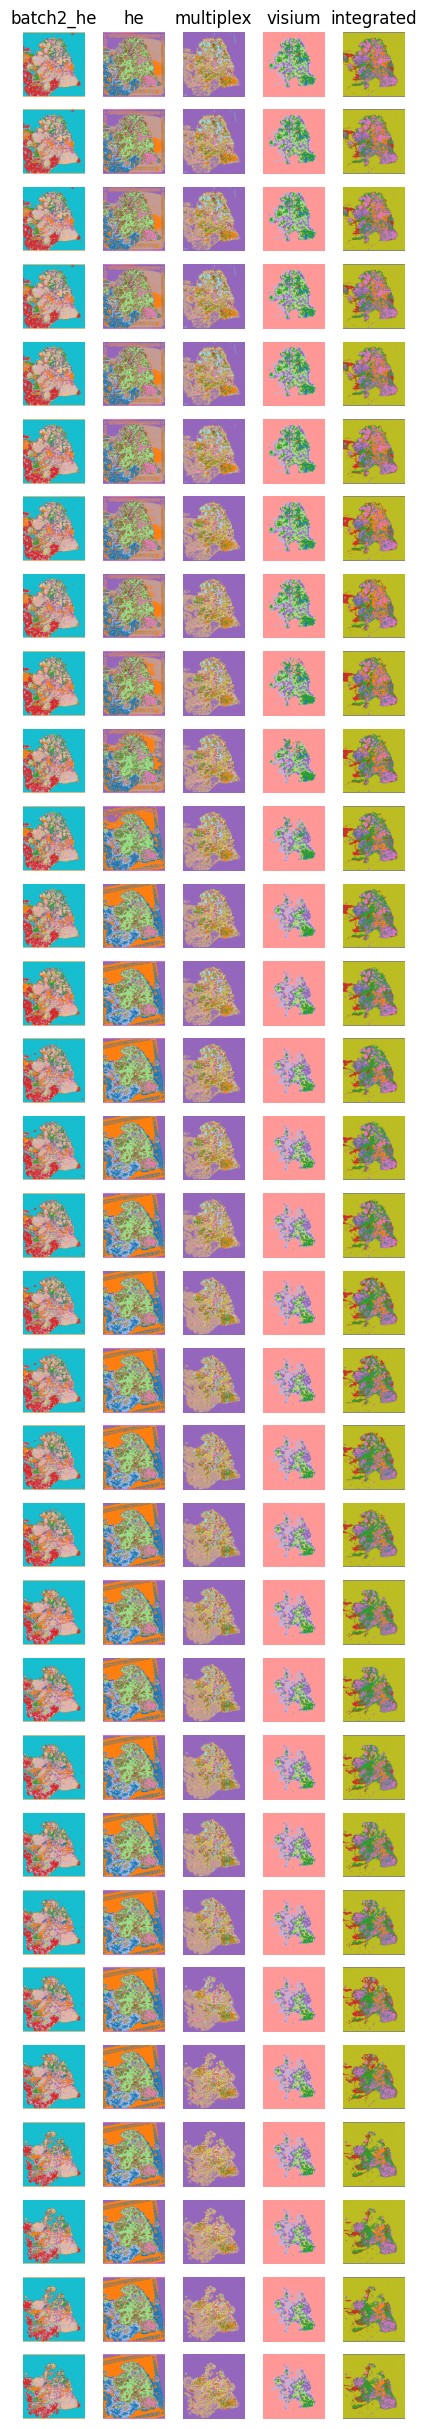

In [36]:
mushroom.display_volumes(dtype_to_volume=level_to_dtype_to_volume[1]['labeled'])

###### st-related

In [15]:
# adata = None
for dtype in mushroom.dtypes:
    parsed_dtype = utils.parse_dtype(dtype)
    sid_to_filepaths, section_ids, fps = datasets.get_config_info(config['sections'], dtype)
    
    if parsed_dtype in ['visium', 'xenium', 'points', 'cosmx']:
        for sid, fp in sid_to_filepaths.items():
            adata = sc.read_h5ad(fp)
            pts = adata.obsm['spatial']
            section_id = (sid, dtype)
            print(section_id)
            
            for level in range(mushroom.num_levels):
                labels = mushroom.assign_pts(pts, section_id, dtype, level=level)
                adata.obs[f'nbhd_l{level}'] = [f'nbhd {x}' for x in labels]
                
                labels = mushroom.assign_pts(pts, section_id, 'integrated', level=level)
                adata.obs[f'nbhd_integrated_l{level}'] = [f'nbhd {x}' for x in labels]
                
                for projection_dtype in mushroom.dtypes:
                    if projection_dtype != dtype:
                        volume = level_to_dtype_to_volume[level]['labeled'][projection_dtype]
                        labels = mushroom.assign_pts(pts, section_id, projection_dtype, level=level, use_volume=True, volume=volume)
                        adata.obs[f'nbhd_projected_{projection_dtype}_l{level}'] = [f'nbhd {x}' for x in labels]
            
            root = fp.split('/')[-1]
            adata.write_h5ad(os.path.join(out_dir, root))
            

... storing 'nbhd_l0' as categorical
... storing 'nbhd_integrated_l0' as categorical
... storing 'nbhd_projected_batch2_he_l0' as categorical
... storing 'nbhd_projected_he_l0' as categorical
... storing 'nbhd_projected_multiplex_l0' as categorical
... storing 'nbhd_l1' as categorical
... storing 'nbhd_integrated_l1' as categorical
... storing 'nbhd_projected_batch2_he_l1' as categorical
... storing 'nbhd_projected_he_l1' as categorical
... storing 'nbhd_projected_multiplex_l1' as categorical
... storing 'nbhd_l2' as categorical
... storing 'nbhd_integrated_l2' as categorical
... storing 'nbhd_projected_batch2_he_l2' as categorical
... storing 'nbhd_projected_he_l2' as categorical
... storing 'nbhd_projected_multiplex_l2' as categorical


('HT397B1-U1', 'visium')


... storing 'nbhd_l0' as categorical
... storing 'nbhd_integrated_l0' as categorical
... storing 'nbhd_projected_batch2_he_l0' as categorical
... storing 'nbhd_projected_he_l0' as categorical
... storing 'nbhd_projected_multiplex_l0' as categorical
... storing 'nbhd_l1' as categorical
... storing 'nbhd_integrated_l1' as categorical
... storing 'nbhd_projected_batch2_he_l1' as categorical
... storing 'nbhd_projected_he_l1' as categorical
... storing 'nbhd_projected_multiplex_l1' as categorical
... storing 'nbhd_l2' as categorical
... storing 'nbhd_integrated_l2' as categorical
... storing 'nbhd_projected_batch2_he_l2' as categorical
... storing 'nbhd_projected_he_l2' as categorical
... storing 'nbhd_projected_multiplex_l2' as categorical


('HT397B1-U21', 'visium')


In [21]:
adata

AnnData object with n_obs × n_vars = 2431 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'nbhd_l0', 'nbhd_integrated_l0', 'nbhd_projected_batch2_he_l0', 'nbhd_projected_he_l0', 'nbhd_projected_multiplex_l0', 'nbhd_l1', 'nbhd_integrated_l1', 'nbhd_projected_batch2_he_l1', 'nbhd_projected_he_l1', 'nbhd_projected_multiplex_l1', 'nbhd_l2', 'nbhd_integrated_l2', 'nbhd_projected_batch2_he_l2', 'nbhd_projected_he_l2', 'nbhd_projected_multiplex_l2'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'ppm', 'spatial'
    obsm: 'spatial', 'spatial_original'

In [17]:
# adata.obs

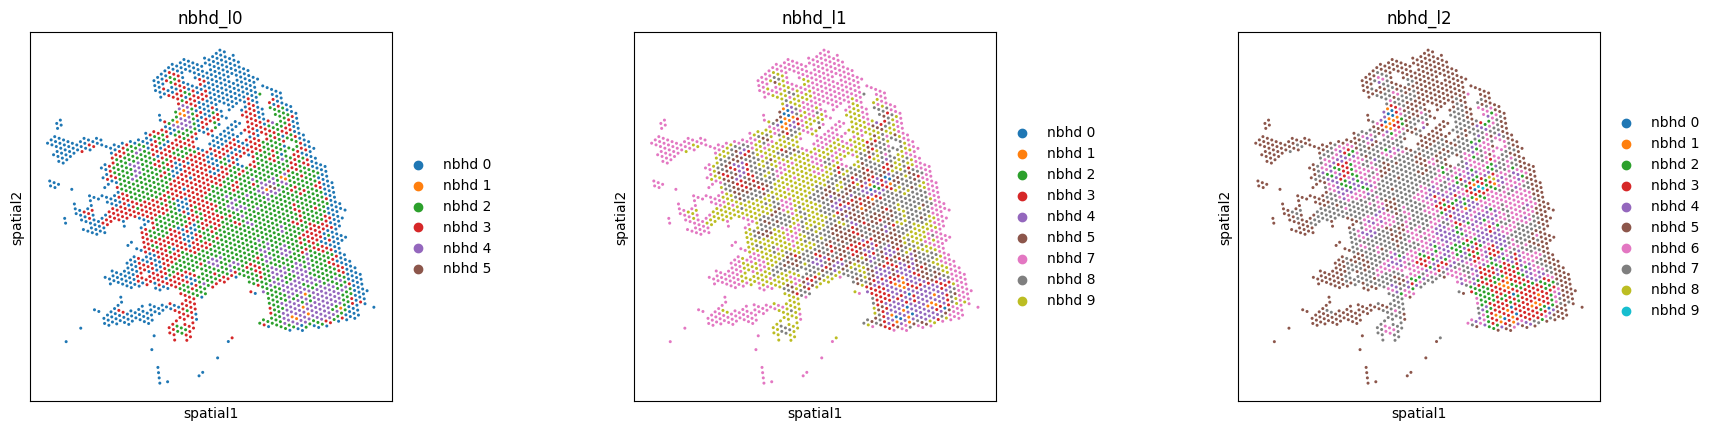

In [22]:
sc.pl.spatial(adata, color=['nbhd_l0', 'nbhd_l1', 'nbhd_l2'], alpha_img=0.)

In [19]:
# sc.pl.spatial(adata, color=['nbhd_integrated_l0', 'nbhd_integrated_l1', 'nbhd_integrated_l2'], alpha_img=0.)

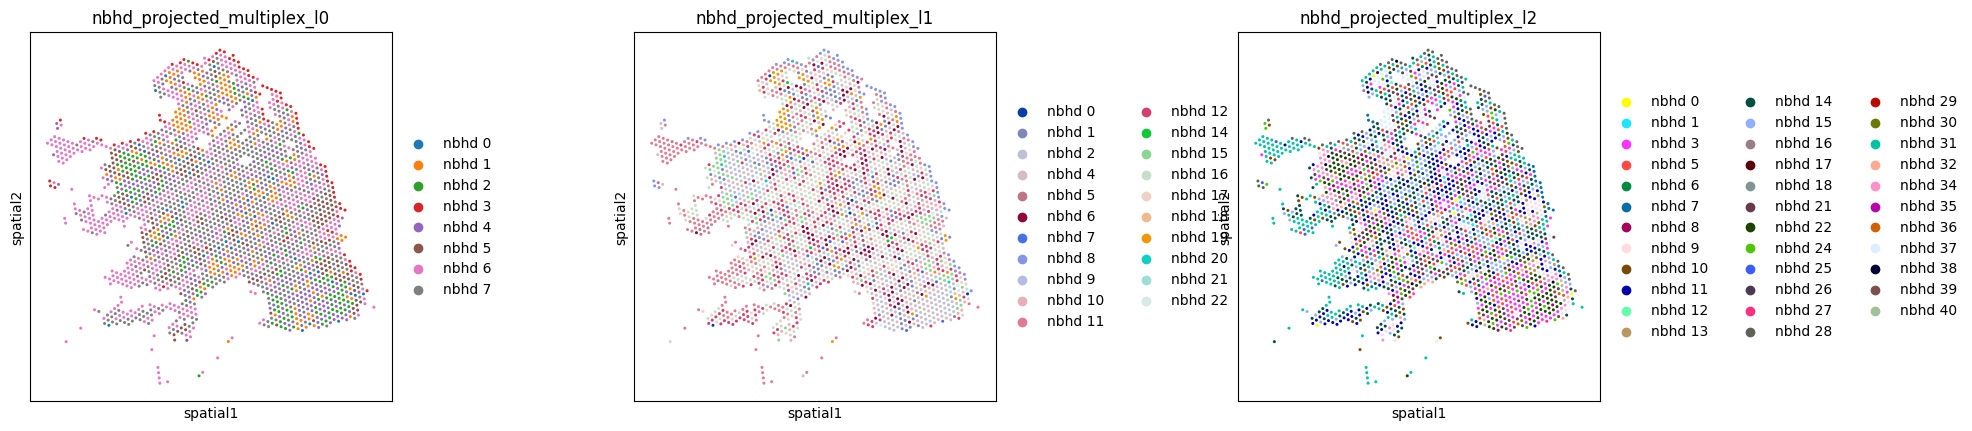

In [23]:
sc.pl.spatial(adata, color=['nbhd_projected_multiplex_l0', 'nbhd_projected_multiplex_l1', 'nbhd_projected_multiplex_l2'], alpha_img=0.)



###### multiplex related

In [24]:
sid_to_filepaths, section_ids, fps = datasets.get_config_info(config['sections'], 'multiplex')
feats_fps = sorted(utils.listfiles(os.path.join(run_dir, case, 'auxiliary', 'multiplex')))
feats_fps

['/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U12.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U2.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U22.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U31.txt']

In [41]:
# df = None
for fp in feats_fps:
    sid = fp.split('/')[-1].replace('.txt', '')
    if sid in sid_to_filepaths:
        df = pd.read_csv(fp, sep='\t', index_col=0)
    
        pts = df[['col', 'row']].values
        
        section_id = (sid, 'multiplex')
        
        print(section_id)
        
        for level in range(mushroom.num_levels):
            labels = mushroom.assign_pts(pts, section_id, 'multiplex', level=level)
            df[f'nbhd_l{level}'] = [f'nbhd {x}' for x in labels]

            labels = mushroom.assign_pts(pts, section_id, 'integrated', level=level)
            df[f'nbhd_integrated_l{level}'] = [f'nbhd {x}' for x in labels]

            for projection_dtype in mushroom.dtypes:
                if projection_dtype != 'multiplex':
                    volume = level_to_dtype_to_volume[level]['labeled'][projection_dtype]
                    labels = mushroom.assign_pts(pts, section_id, projection_dtype, level=level, use_volume=True, volume=volume)
                    df[f'nbhd_projected_{projection_dtype}_l{level}'] = [f'nbhd {x}' for x in labels]
                    
            
        root = fp.split('/')[-1]
        out_fp = os.path.join(out_dir, root.replace('.txt', '_multiplex.txt'))
        print(out_fp)
        df.to_csv(out_fp, sep='\t')

('HT397B1-U12', 'multiplex')
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/projected_features/HT397B1-U12_multiplex.txt
('HT397B1-U2', 'multiplex')
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/projected_features/HT397B1-U2_multiplex.txt
('HT397B1-U22', 'multiplex')
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/projected_features/HT397B1-U22_multiplex.txt
('HT397B1-U31', 'multiplex')
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/projected_features/HT397B1-U31_multiplex.txt


In [42]:
# df

In [43]:
# sns.scatterplot(data=df, x='col', y='row', hue='nbhd_l0', s=.1)
# plt.gca().invert_yaxis()
# plt.axis('equal')
# plt.axis('off')

# legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))